# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

General information

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


Summary statistics

In [3]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


Visualise data

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

Bxoplot default vs income

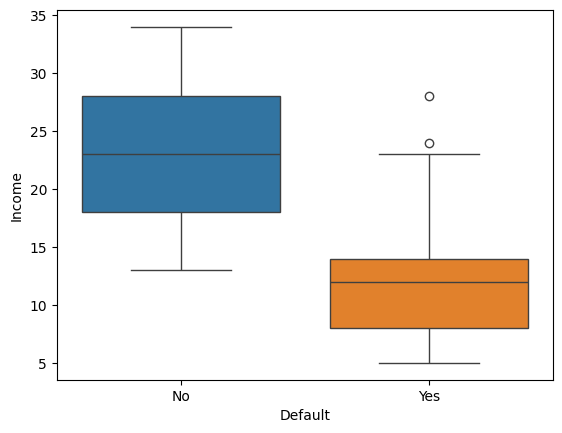

In [5]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income', hue = 'Default')

Boxplot Default vs Laond Amount

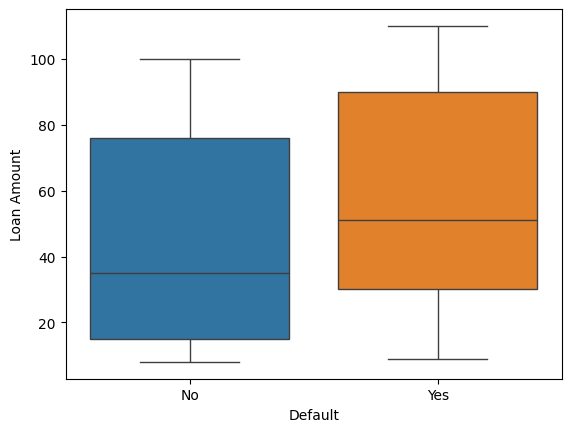

In [6]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount', hue = 'Default')

Scatterplot to see relationshipbetween Loan Amount and Income

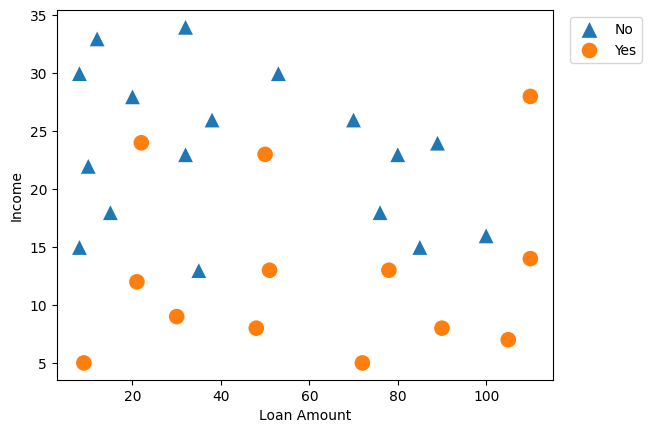

In [7]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

To train our data we select dependent (y) and independent (x)  variables

In [8]:
y = loan[['Default']]

In [9]:
X = loan [['Income', 'Loan Amount']]

Now, we need to build a model. We can now split our data, before to do so, we have to import the train test plit function from the SK learn model selections package. Using this, we can split the data, X and y data fromaes, into X_train X_test, y_train, and y_test. Note that here we set strain size to 0.8. This means we want 80% of the original data to become the training data, while 20% becomes the test data.  We also set stratify as y which means we want the data splits using stratified random sampling based on the values of y. Finally, we set random state to 12234, simple so we get the same results every time we do the split. 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, # 80% is training data, 20% remaining test data
                                                    stratify = y,
                                                    random_state = 1234) 

The shape attribute of the X_train and X_test data frames tell us how many instances or records, are in each data frame. 

In [11]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

We can see that 24 incidents are in train set and 6 incidents are test set

## 4. Train and Evaluate the Classification Tree

To build a classification tree in Python, we need to import the decision tree classifier clas from the SK learn tree sub package. We then instant sheet an object from the class. We call the object classifier.

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

Now that we have an object, we can build or fit a classification tree model using the training data. 

In [13]:
model = classifier.fit(X_train, y_train)

To evaluate the future performance of our model, we can now see how this model fits against the test data. To do so, we pass the test data to the score method of the model. This returns the accuracy of the model against the test data

In [14]:
model.score(X_test, y_test)

0.5

We can see that our classification tree is only able to accurately explain 50% of the relationship between the independent variables and a dependent variable within the test data.

## 5. Visualize the Classification Tree

We trained our classification tree now it is ready to visualise. It to get a better understanding. 
This allows us to specify the size of our tree. 

The first we import the tree object from the sklearn package.The figure_method of Pyplot  allows us to specify the size of our tree. Feel free to adjust this to see how it impacts the size of your tree. Finally, we use the plot_treee method of the tree object to visualize the tree. 

The first argument we pass to this method is the classification tree model itself, model. Then we specify the independent variables as list. Next, we specify the possible values of the dependent variable as a list  in ascending order, No and Yes. Finally, we specify that we want the nodes of the Tree color filled.

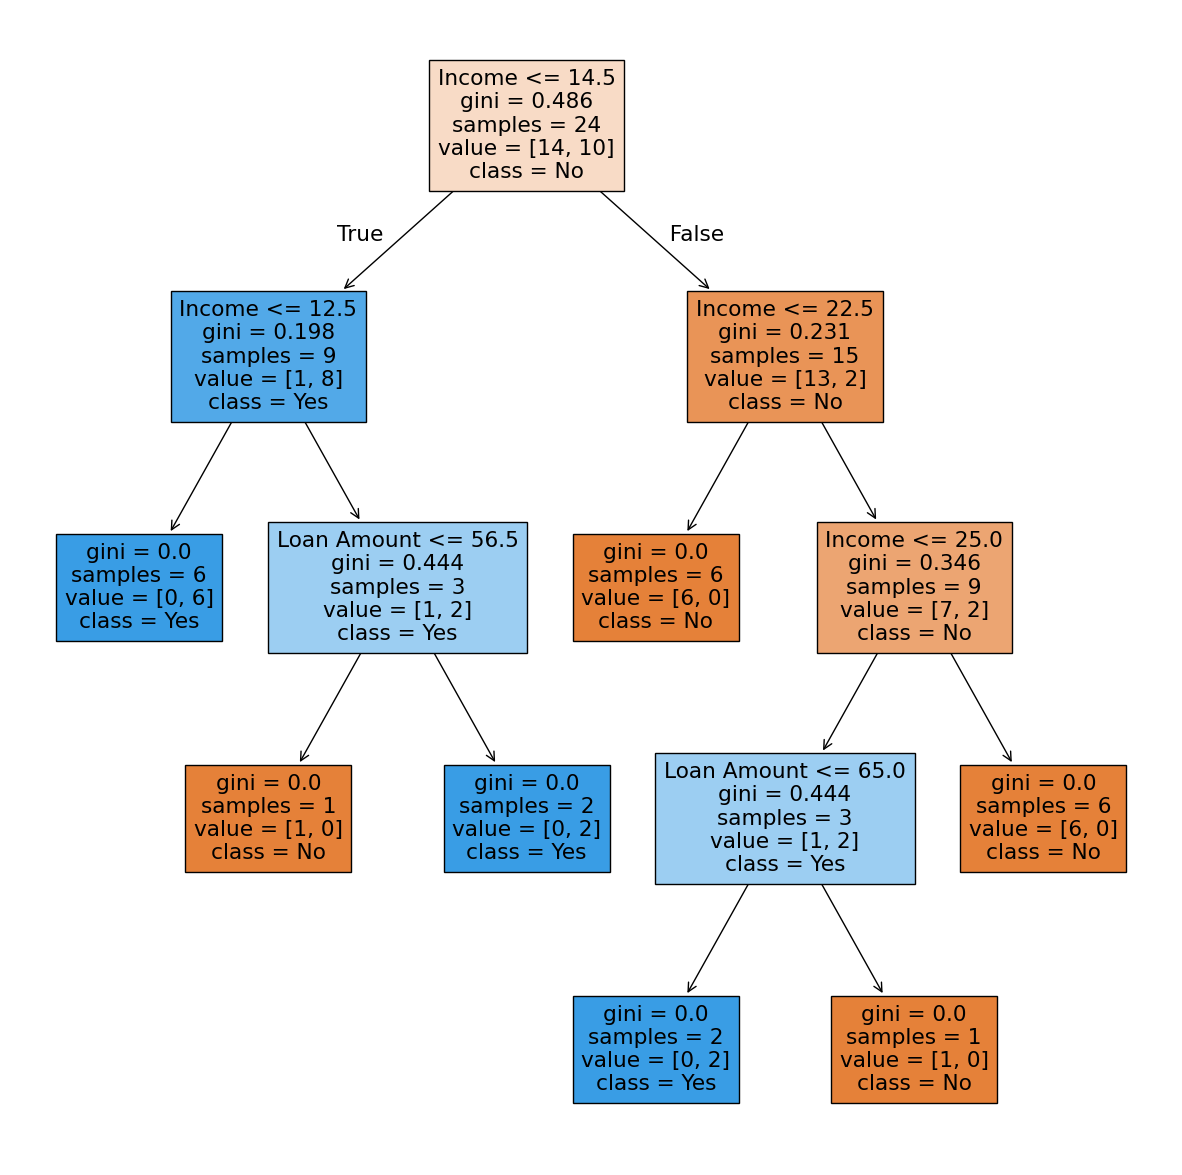

In [15]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, # plot tree is a method for classification tree
               feature_names= list(X.columns),
               class_names= ['No', 'Yes'],
               filled=True);

We see that the root node asks the question is income less than or equal to $14.500? 

This means that the first splits that the classifier made during the recursive partitioning process is that income equal to 14.5. The fact that income variable was used as the first split, let's us know that it is the most important variable within the dataset in predicting the outcome. 

The branch to the left of each node is for the Yes response, while the branch to the right is for the No response. 
Within each node, we get a value for the Gini impurity score. GINI is a measure of the degree  of impurity in the partition. the smaller value is the more homogenous the items in a partition are.

We also see the number of items or SAMPLES within each partition. Notice that this value decreases as we work our way down the tree towards the leaf nodes. This is expected since the primary objective or recursive partitioning is to create smaller, more homogenous subsets of the data.

The next information in each node, VALUE, indicates the count of items within each class. This is the item distribution. For example, in the root node there are 14 items with a value of No and 10 with a value of Yes. 

The Noes are the majority, which is why the class value is equal to No. This means that if our classification tree were just one node, the root it would be label every loan as not default. 

Notice how the Gini impurity values change in relation to the item distributions. As one class dominates, the Gini value tends toward zero. 

One of the benefits of decision trees is that they are pretty good at ranking the effectivness of independent variables and predicting the values of the dependent variable.  This is known as feature_importance. We can visualise the feature_importance of the independent variables as follows. 

First, we assign the feature importances on the score attribute of the model to a variable, which we call importance. The attribute returns an array of the imporant scores of each independent variable. 

Next we create a pandas Series called feature_importance by using the importance aray as the values and the independent variable names as the index. 

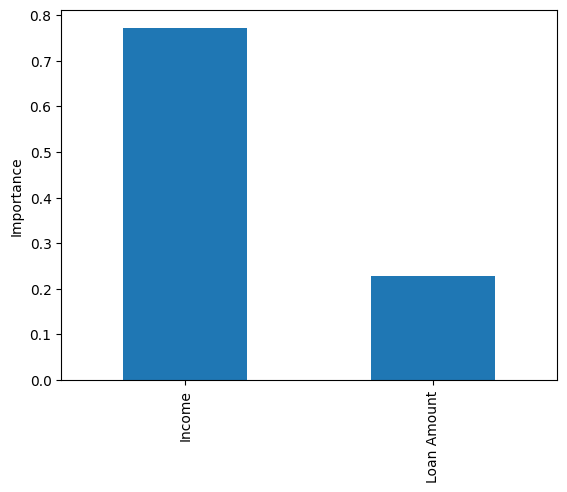

In [30]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

From the plot, we see that the income variable is more important than the loan amount in predicting wether a borrower will default on their loan or not. 

## 6. Prune the Classification Tree

Decision trees are prone to overfitting. One telltale sing that a tree has overfit is if it has a high accuracy score on the training data with a low accuracy score on the test data. 

Let's start by getting our trees accuracy on the training data. To do this we pass the training data to the score method of the model

In [16]:
model.score(X_train, y_train)

1.0

A model is 100% accurate on a training data. That's suspicious. 

Let's get a second opinion from the test data. Simmilarly, we passs the test data to the score method of the model. 


In [17]:
model.score(X_test, y_test)

0.5

Our model is 50% acccurate on the test data. The moel has definitely overfit on the training data and needs to be pruned. 


There are two ways to prune a decision tree. 
+ One is to set parameters that manage its growth during the recursive partitioning process. This is known as pre-pruning. 
+ Another approach is to allow the tree to fully grow on impeded and then gradually reduce its size in order to improve its performance. This is know as post-pruning. 

In this example, we will use a pre-running approach. This means that we need to figure out the best combination of values for the parameters of the tree that will result in the best performance. This is known as hyper parameter tuning. 
The psyche learned package scikit-learn provides several parameters we can tune during this process. 
We will limit ourselves to three of them 
We start by creating a dictionary which we call grid that holds the values of the parameters we want to try out. 

+ The first parameter is max_depth. This sets the maximum depth of the decision tree. We will try setting the valu to two, three, four and five to see which is the best.  
+ The next parameter is min_sample_split. This sets the minimum number of items we can have in the partition before it can be split. Studies show that a value between one and 40 is the best. We will try setting the value to two, hree and four. 
+ min_samples_leaf parameter. This sets the minimum number of items we have in a leaf node. Studeis show that the best values are between one and 20. We will try setting the value to two, three, four, five and six.

In [18]:
grid = {'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1,2,3,4,5,6]}

The gridsearch CV class from the scikit-learn model selection sub package allows us to perform a great search to find the best parameter values for our tree. We imort the class then we instantiate a decision tree classifier object and then we pass the object to a new grid search CV object, which we cal GCV. We also pass the parameter grid to the object. We then pass the training data to the fit method of GCV so it evaluates each hyper parameter combination in grid. 

In [44]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator= classifier, param_grid=grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

The best estimator attributes of GCV returns the classifier with the best combination of hyper parameters for our data, let's get that.

In [45]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

The output shows that the best combination of hype parameters is max_depth set at 2 and min_samples_leaf set at 6. 

Now we can reevaluate how well our model fits the training data by passing the training data to the score method of the model. 

In [46]:
model_.score(X_train, y_train)

0.875

We can see that the accuracy has gone down from 100% to 87.5%. 

Let's see how the model fits the test data as well. 

In [47]:
model_.score(X_test, y_test)

0.8333333333333334

Now, the model's accuracy on the test data has risen from 50% to 83.3% that is much better. 


Finally, we can visualize our prune model. 

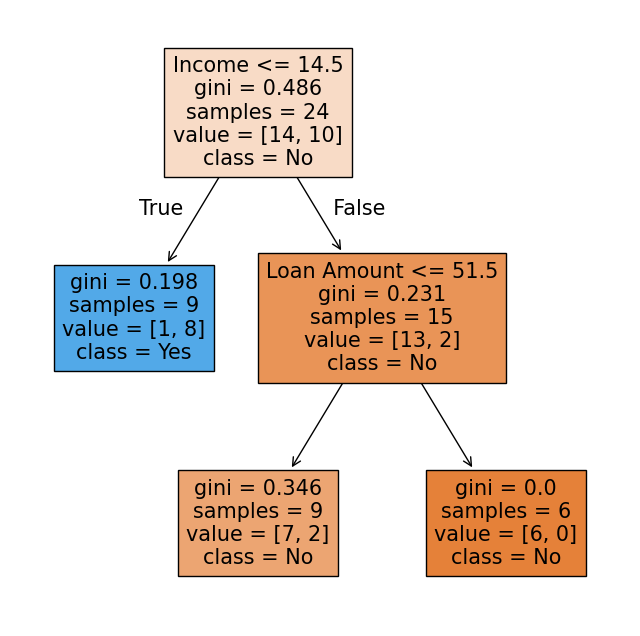

In [48]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);

Our prune tree is much smaller than the one we started off with but it generaliyes much better. 